## Black friday data set EDA and Feature Engineering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## PROBLEM  STATEMENT

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [2]:
# importing the train data
df_train = pd.read_csv('../input/black-friday/train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df_train.shape

(550068, 12)

In [4]:
#import the test data
df_test = pd.read_csv('../input/black-friday/test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [5]:
df_test.shape

(233599, 11)

In [6]:
df = pd.concat([df_train,df_test])

In [7]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [8]:
df.shape

(783667, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [10]:
## Checking for duplicated records
df.duplicated().sum()

0

In [11]:
## Checking for null values
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [12]:
df['Product_Category_2'].unique() #checking the type of data

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [13]:
df['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [14]:
# Replaceing nan values with mode value that is (8.0)

In [15]:
mode_value2 = df['Product_Category_2'].mode()[0]
mode_value2

8.0

In [16]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(mode_value2)

In [17]:
df.duplicated().sum()

0

In [18]:
## Checking for null values
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [19]:
df['Product_Category_3'].unique() #checking the type of data

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [20]:
df['Product_Category_3'].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [21]:
mode_value3 = df['Product_Category_3'].mode()[0]
mode_value3

16.0

In [22]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(mode_value3)

In [23]:
## Checking for null values
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
dtype: int64

### Presenting some visual outcomes

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

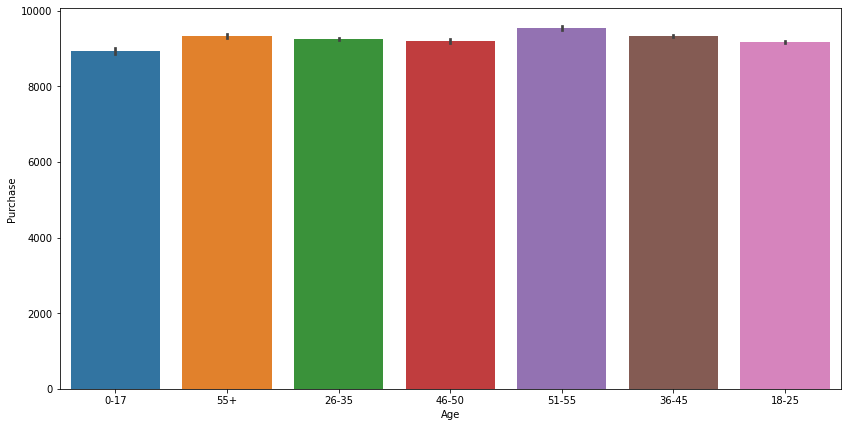

In [24]:
plt.figure(figsize=(14,7))
sns.barplot(data=df, x='Age', y ='Purchase')

## Observation
1. Age group 51-55 has done the heighest puchasing.
2. Overall all the age groups have not much fluctuations regarding their age. 


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

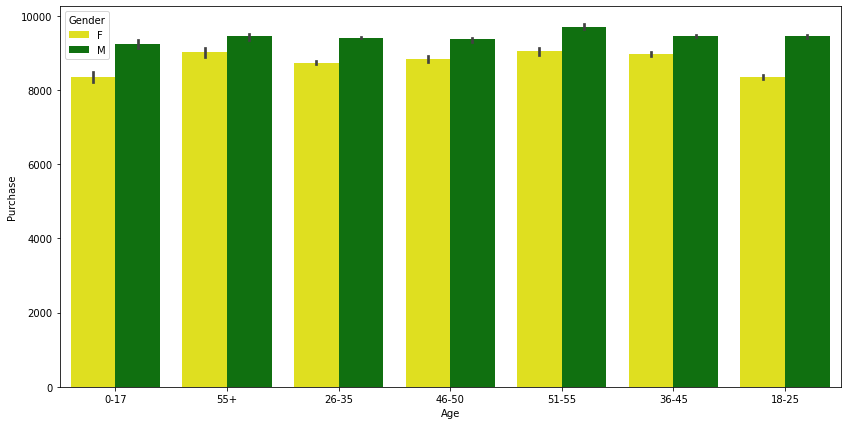

In [25]:
plt.figure(figsize=(14,7))
sns.barplot(data=df, x='Age', y ='Purchase', hue='Gender', palette=['yellow','green'])

## Observation
1. Purchaseing done by male is more than female for every age group

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

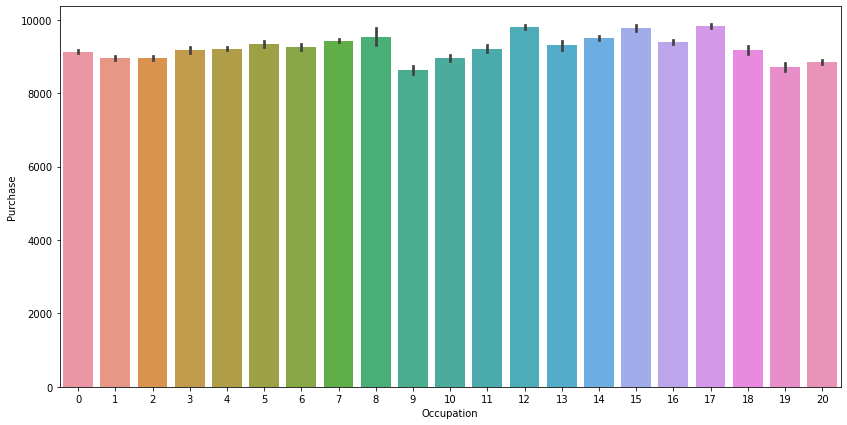

In [26]:
## puchase with respect to occupation
plt.figure(figsize=(14,7))
sns.barplot(data=df, x='Occupation', y ='Purchase')

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

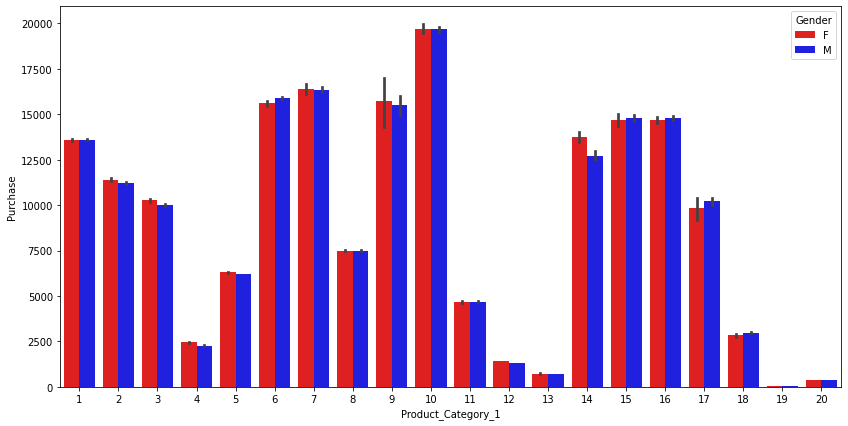

In [27]:
## puchase with respect to product category
plt.figure(figsize=(14,7))
sns.barplot(data=df, x='Product_Category_1', y ='Purchase', hue='Gender', palette=['red','blue'])

### Observation

1. product category 1, 10th product has been puchchased most of the time by both male and female.
2. product category 1, 19th product has been puchchased least by both male and female.

<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

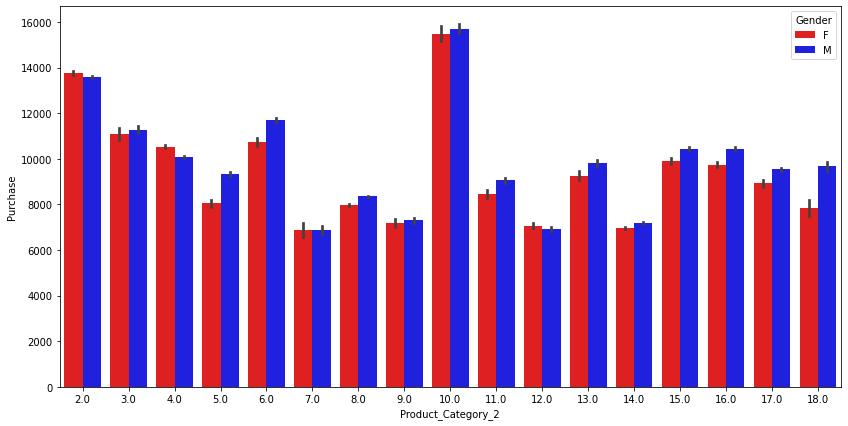

In [28]:
## puchase with respect to product category
plt.figure(figsize=(14,7))
sns.barplot(data=df, x='Product_Category_2', y ='Purchase', hue='Gender', palette=['red','blue'])

### Observation

1. product category 2, 10th product has been puchchased most of the time by both male and female.
2. product category 2, 7th, 9th, 12th and 14th product has been puchchased least by both male and female.

<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

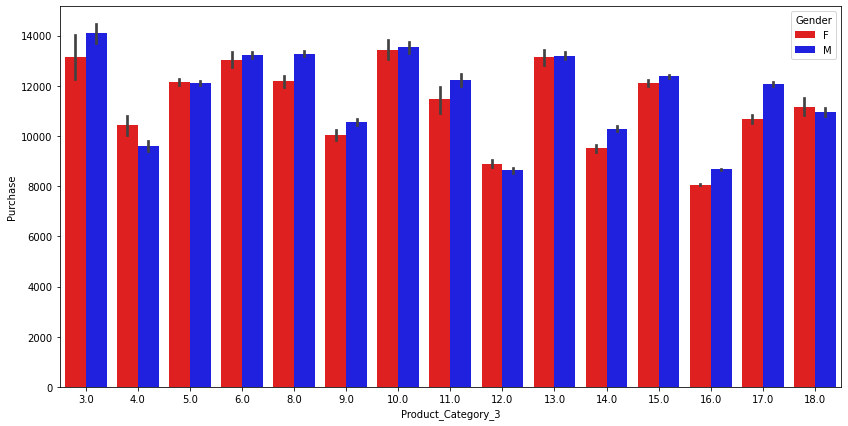

In [29]:
## puchase with respect to product category
plt.figure(figsize=(14,7))
sns.barplot(data=df, x='Product_Category_3', y ='Purchase', hue='Gender', palette=['red','blue'])

### Observation

1. product category 3, 3th product has been puchchased most of the time by both male and female have seen higer deviation for      purchasing this product.

2. product category 3, 16th product has been puchchased least by both male and female.

In [30]:
# As the columns data has no use its good to drop  that column

df.drop('User_ID',axis=1,inplace=True)
df.drop('Product_ID', axis=1, inplace=True)

In [31]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,8.0,16.0,8370.0
1,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,F,0-17,10,A,2,0,12,8.0,16.0,1422.0
3,F,0-17,10,A,2,0,12,14.0,16.0,1057.0
4,M,55+,16,C,4+,0,8,8.0,16.0,7969.0


In [32]:
# Handeling categorical feature gender
df['Gender'] = df['Gender'].map({'F':0,'M':1})
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0-17,10,A,2,0,3,8.0,16.0,8370.0
1,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,0,0-17,10,A,2,0,12,8.0,16.0,1422.0
3,0,0-17,10,A,2,0,12,14.0,16.0,1057.0
4,1,55+,16,C,4+,0,8,8.0,16.0,7969.0


In [33]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [34]:
## encodinf age data category into numerical data

df['Age'] = df['Age'].map({'0-17':1, '18-25':2, '26-35':3, '36-45':4, '46-50':5, '51-55':6, '55+':7})
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,A,2,0,3,8.0,16.0,8370.0
1,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,0,1,10,A,2,0,12,8.0,16.0,1422.0
3,0,1,10,A,2,0,12,14.0,16.0,1057.0
4,1,7,16,C,4+,0,8,8.0,16.0,7969.0


In [35]:
# handeling city category column
df_city = pd.get_dummies(df['City_Category'], drop_first=True)
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [36]:
df = pd.concat([df,df_city], axis=1)
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,A,2,0,3,8.0,16.0,8370.0,0,0
1,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,0,1,10,A,2,0,12,8.0,16.0,1422.0,0,0
3,0,1,10,A,2,0,12,14.0,16.0,1057.0,0,0
4,1,7,16,C,4+,0,8,8.0,16.0,7969.0,0,1


In [37]:
# As we no longer require this category 
df.drop('City_Category', inplace=True, axis=1)

In [38]:
#exploring Stay_In_Current_City_Years column
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [39]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int64  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   Stay_In_Current_City_Years  783667 non-null  object 
 4   Marital_Status              783667 non-null  int64  
 5   Product_Category_1          783667 non-null  int64  
 6   Product_Category_2          783667 non-null  float64
 7   Product_Category_3          783667 non-null  float64
 8   Purchase                    550068 non-null  float64
 9   B                           783667 non-null  uint8  
 10  C                           783667 non-null  uint8  
dtypes: float64(3), int64(5), object(1), uint8(2)
memory usage: 77.4+ MB


In [41]:
# Stay_In_Current_City_Years is in object format so we have to convert it into integer type
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int64  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   Stay_In_Current_City_Years  783667 non-null  int64  
 4   Marital_Status              783667 non-null  int64  
 5   Product_Category_1          783667 non-null  int64  
 6   Product_Category_2          783667 non-null  float64
 7   Product_Category_3          783667 non-null  float64
 8   Purchase                    550068 non-null  float64
 9   B                           783667 non-null  uint8  
 10  C                           783667 non-null  uint8  
dtypes: float64(3), int64(6), uint8(2)
memory usage: 77.4 MB


In [42]:
df['B'] = df['B'].astype(int)
df['C'] = df['C'].astype(int)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int64  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   Stay_In_Current_City_Years  783667 non-null  int64  
 4   Marital_Status              783667 non-null  int64  
 5   Product_Category_1          783667 non-null  int64  
 6   Product_Category_2          783667 non-null  float64
 7   Product_Category_3          783667 non-null  float64
 8   Purchase                    550068 non-null  float64
 9   B                           783667 non-null  int64  
 10  C                           783667 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 87.9 MB


## Feature Scaling

In [44]:
df_test = df[df['Purchase'].isnull()]

In [45]:
df_train = df[df['Purchase'].notnull()]

In [46]:
X = df_train.drop('Purchase', axis=1)

In [47]:
y = df_train['Purchase']

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)